In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.preprocessing import OneHotEncoder


sb.set()

In [147]:
def train_test_split_func(X,y,test_size): # This function retunrs X_train,X_test,y_train,y_test as a list

    data = list(train_test_split(X,y,test_size=test_size))
    print(f'X_train: {data[0].shape}')
    print(f'X_test: {data[1].shape}')
    print(f'y_train: {data[2].shape}')
    print(f'y_test: {data[3].shape}')

    return data 

In [148]:
def logistic_regression(model,X_train,X_test,y_train,y_test):  # This function returns the y_train_predict and the y_test_predict
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    accuracy_train = model.score(X_train,y_train)
    accuracy_test = accuracy_score(y_test,y_test_pred)

    print(f'Train Accuracy: {accuracy_train}')
    print(f" Test Accuracy: {accuracy_test}")
    return y_train_pred,y_test_pred 

In [149]:
def confusion_matrix_func(y_test,y_test_pred):

    sb.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f", annot_kws={"size": 18})

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives 
    fpTest = cmTest[0][1] # False Positives 
    tnTest = cmTest[0][0] # True Negatives 
    fnTest = cmTest[1][0] # False Negatives 

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
    print()

    precision_test_rf = precision_score(y_test,y_test_pred, pos_label = 'Approved')
    recall_test_rf = recall_score(y_test,y_test_pred, pos_label = 'Approved')
    f1_test_rf = f1_score(y_test,y_test_pred, pos_label='Approved')
    print("Precision: {0:.4f}" .format(precision_test_rf)) 
    print("Recall: {0:.4f}" .format(recall_test_rf))
    print("F-score: {0:.4f}" .format(f1_test_rf))


In [150]:
creditcardData = pd.read_csv('credit-approval_csv.csv')
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [151]:
ccData = pd.DataFrame(creditcardData[['Debt','Income','YearsEmployed','CreditScore','Approved_Status']])
ccData.head()

,Debt,Income,YearsEmployed,CreditScore,Approved_Status
0,0.000,0,1.25,1,Approved
1,4.460,560,3.04,6,Approved
2,0.500,824,1.50,0,Approved
3,1.540,3,3.75,5,Approved
4,5.625,0,1.71,0,Approved


In [152]:
ccData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Debt             690 non-null    float64
 1   Income           690 non-null    int64  
 2   YearsEmployed    690 non-null    float64
 3   CreditScore      690 non-null    int64  
 4   Approved_Status  690 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 27.1+ KB


In [153]:
ccData.describe()

,Debt,Income,YearsEmployed,CreditScore
count,690.000000,690.000000,690.000000,690.00000
mean,4.758725,1017.385507,2.223406,2.40000
std,4.978163,5210.102598,3.346513,4.86294
min,0.000000,0.000000,0.000000,0.00000
25%,1.000000,0.000000,0.165000,0.00000
50%,2.750000,5.000000,1.000000,0.00000
75%,7.207500,395.500000,2.625000,3.00000
max,28.000000,100000.000000,28.500000,67.00000


In [154]:
y = pd.DataFrame(ccData['Approved_Status'])
X = pd.DataFrame(ccData.drop('Approved_Status',axis=1))
y = y.squeeze()

In [155]:
[X_train, X_test, y_train, y_test] = train_test_split_func(X,y,0.3)

X_train: (483, 4)
X_test: (207, 4)
y_train: (483,)
y_test: (207,)


In [156]:
model = LogisticRegression()
y_train_pred,y_test_pred = logistic_regression(model,X_train,X_test,y_train,y_test)

Train Accuracy: 0.7391304347826086
 Test Accuracy: 0.8115942028985508


TPR Test :	 0.8830188679245283
TNR Test :	 0.5642201834862385

FPR Test :	 0.43577981651376146
FNR Test :	 0.1169811320754717

Precision: 0.7987
Recall: 0.5642
F-score: 0.6613


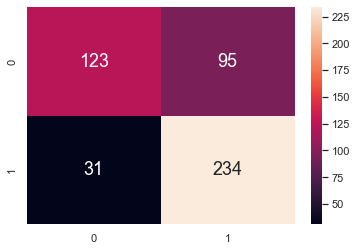

In [157]:
confusion_matrix_func(y_train,y_train_pred)

TPR Test :	 0.9491525423728814
TNR Test :	 0.6292134831460674

FPR Test :	 0.3707865168539326
FNR Test :	 0.05084745762711865

Precision: 0.9032
Recall: 0.6292
F-score: 0.7417


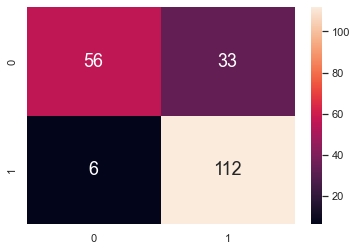

In [158]:
confusion_matrix_func(y_test,y_test_pred)

In [159]:
# y = pd.DataFrame(ccData['Approved_Status'])
# X = pd.DataFrame(ccData.drop(['Approved_Status','Income','Debt','YearsEmployed'],axis=1))
# y = y.squeeze()

In [160]:
# [X_train,X_test,y_train,y_test] = train_test_split_func(X,y,0.2)

In [161]:
# y_train_pred,y_test_pred = logistic_regression(X_train,X_test,y_train,y_test)

In [162]:
# confusion_matrix_func(y_test,y_test_pred)

# Scaled 

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [164]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [165]:
X_train_scaled

array([[ 1.87641888,  0.04898102, -0.67843061,  1.63953287],
       [-0.64484052,  0.16254209, -0.34417284,  2.6076189 ],
       [ 1.28229436, -0.18516552, -0.06228725, -0.49025641],
       ...,
       [-0.93838427, -0.18516552, -0.60141269, -0.49025641],
       [-0.77050137, -0.18432928, -0.66610775, -0.49025641],
       [-0.18441914, -0.18516552, -0.48588581,  1.25229845]])

In [166]:
model = LogisticRegression()
y_train_pred,y_test_pred =  logistic_regression(model,X_train_scaled,X_test_scaled,y_train,y_test)

Train Accuracy: 0.7494824016563147
 Test Accuracy: 0.8260869565217391


TPR Test :	 0.8981132075471698
TNR Test :	 0.5688073394495413

FPR Test :	 0.43119266055045874
FNR Test :	 0.1018867924528302

Precision: 0.8212
Recall: 0.5688
F-score: 0.6721


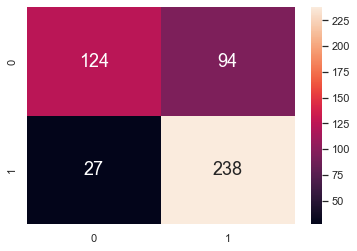

In [167]:
confusion_matrix_func(y_train,y_train_pred)

TPR Test :	 0.9661016949152542
TNR Test :	 0.6404494382022472

FPR Test :	 0.3595505617977528
FNR Test :	 0.03389830508474576

Precision: 0.9344
Recall: 0.6404
F-score: 0.7600


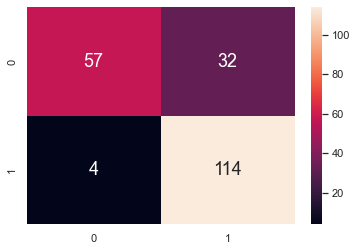

In [168]:
confusion_matrix_func(y_test,y_test_pred)